# Regressão e Correlação

Renato Naville Watanabe

As técnicas de correlação e regressão analisam dados amostrais, procurando determinar como duas (ou mais) variáveis estão relacionadas umas com as outras.

Exemplos:

| Variável independente | Variável dependente |
------------------------|----------------------
|Horas de treinamento   | Número de acidentes |
|Altura da pessoa       | Número do sapato    |
|Cigarros por dia       | Capacidade pulmonar |
|Meses do ano           | Volume de vendas    |
|Peso da pessoa         |    QI               |


- **Independente**: Valores manipulados ou selecionados pelo pesquisador (altura, idade, mês). Podem ser ou não a “causa” da variável dependente.

- **Dependente**: Valores observados, contados, ou medidos, que não estejam sob controle direto do pesquisador (velocidade, taxa de câmbio). Podem ser “causadas” ou não pela variável independente.

- **OBS.**: Quando não há relação causal óbvia entre duas ou mais variáveis, qual é independente ‘ ou ‘dependente’ é uma questão de rótulo.

A análise de **correlação** tem como resultado um número que expressa o grau de relacionamento entre duas variáveis.

A análise de **regressão** expressa o resultado em uma equação matemática, descrevendo o relacionamento.

Ambas análises, geralmente utilizadas em pesquisas exploratórias.

### A reta que liga dois pontos

É simples encontrar a reta que liga dois pontos.

A inclinação é:

$$m = \frac{y_2-y_1}{x_2-x_1}$$

e o intercepto é:

$$b = y_1 - mx_1$$

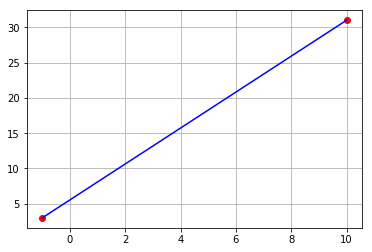

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot(-1, 3, marker = 'o', color = 'red')
plt.plot(10, 31, marker = 'o', color = 'red')
x = np.linspace(-1, 10, 50)
m = 28/11
b = 3+m
y = m*x+b
plt.plot(x, y, linestyle = '-', color = 'b')
plt.grid()
plt.show()


### E se tivermos muitos pontos? 

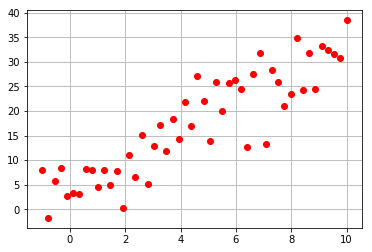

In [5]:
y = m*x+b+5*np.random.randn(len(x))
plt.figure()
plt.plot(x , y, marker='o', color='red', linestyle='')
plt.grid()
plt.show()


### Qual seria a melhor reta que aproxima todos os pontos?

A pergunta pode ser entendida como sendo: qual os melhores valores de $m$ e $b$ para que a reta aproxime todos os pontos?

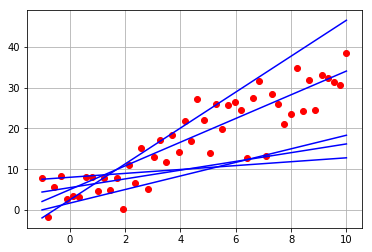

In [6]:

plt.figure()
plt.plot(x , y, marker='o', color='red', linestyle='')
for i in range(5):
    mr = m + 2*np.random.randn(1)
    br = b + 3*np.random.randn(1)
    plt.plot(x, mr*x+br, linestyle = '-', color = 'blue')
plt.grid()
plt.show()

### Primeiro precisamos de um critério para decidir o que seria "a melhor reta"

O critério normalmente escolhido é o erro de cada ponto para a reta estimada elevado ao qudadrado. A melhor reta então é a reta em que a soma dos desvios (na figura indicado pelas retas pretas) ao quadrado é a menor possível. Por este motivo, o método para encontrar a reta de regressão também é conhecido com **método dos mínimos quadrados**

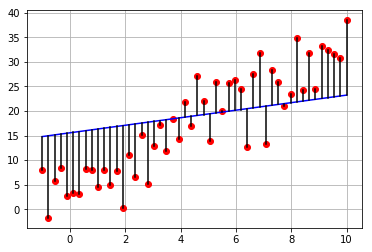

In [9]:
plt.figure()
plt.plot(x , y, marker='o', color='red', linestyle='')
mr = m + 2*np.random.randn(1)
br = b + 3*np.random.randn(1)
plt.plot(x, mr*x+br, linestyle = '-', color = 'blue')    
for i in range(len(y)):
    plt.plot(np.array([x[i], x[i]]), np.array([y[i], mr*x[i]+br]), 
             linestyle='-', color='black')
plt.grid()
plt.show()

### Regressão

A reta encontrada seguindo o critério dos mínimos quadrados é:

$$m = \frac{\displaystyle\sum_{i=0}^{n-1}(x[i]-\mu_x)(y[i]-\mu_y)}{\displaystyle\sum_{i=0}^{n-1}(x[i]-\mu_x)^2} $$

$$b = \mu_y - m\mu_x $$

$$y = mx + b $$

In [10]:
mediaX = np.mean(x)
mediaY = np.mean(y)
desvioX = x - mediaX
desvioY = y - mediaY
m = np.sum(desvioX*desvioY)/np.sum(desvioX**2)
b = mediaY - m*mediaX

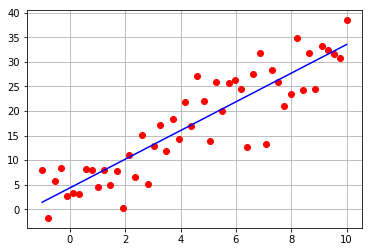

In [11]:
plt.figure()
plt.plot(x , y, marker='o', color='red', linestyle='')
plt.plot(x, m*x+b, linestyle = '-', color = 'blue')    
plt.grid()
plt.show()

Uma função para calcular a reta de regressão pode ser:
    


In [18]:
def regressao(x, y):
    '''
    Calcula a inclinação m ep intercepto b da reta de regressão utilizado o método dos 
    mínimos quadrados. Plota um gráfico com os dados e a reta encontrada.
    
    Parâmetros:
    -------------------------------
    x: vetor do Numpy
       vetor contendo os valores do vetor x
    
    y: vetor do Numpy
       vetor contendo os valores do vetor y
       
    Retorna
    -------------------------------
    
    m: float
       inclinação da reta de regressão
       
    b: float
       intercepto da reta de regressão
    '''
    m = mediaX = np.mean(x)
    mediaY = np.mean(y)
    desvioX = x - mediaX
    desvioY = y - mediaY
    m = np.sum(desvioX*desvioY)/np.sum(desvioX**2)
    b = mediaY - m*mediaX
    
    plt.figure()
    plt.plot(x, y, marker='s',color='red',linestyle='')
    plt.plot(np.sort(x), m*np.sort(x)+b, color='blue')
    plt.show()
    
    return m, b

Este arquivo contém medições de comprimento e largura de pétalas e sépalas de três
espécies de iris: virginica, versicolor, e setosa.

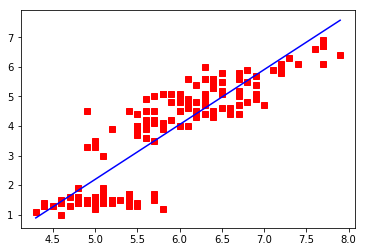

1.8584329782548406
-7.1014433696024515


In [21]:
import pandas as pd
iris = pd.read_csv('dados/iris.csv', delimiter=';')
m, b = regressao(iris['Comprimento.Sepala'], iris['Comprimento.Petala'])
print(m)
print(b)

### Correlação

A análise gráfica do comportamento entre as variáveis mostra a existência de **correlação negativa**, pois à medida que X cresce, Y decresce. O gráfico mostra que a empresa, ao investir em treinamento, reduz o número de acidentes na fábrica.

![emp](figuras/empresa.png)

A análise gráfica do comportamento entre as variáveis mostra a existência de **correlação  positiva**, pois à medida que X cresce, Y também cresce.

O gráfico mostra que, com o aumento médio da renda da população, o consumo de bens duráveis aumenta.

![pop](figuras/pop.png)

Não há correlação linear, o gráfico mostra que não existe evidência de alguma relação entre o peso de uma pessoa com seu Q.I.

![qi](figuras/iq.png)

### Correlação

Utilizar apenas um gráfico  para interpretar a existência de uma correlação pode ser uma tarefa bastante subjetiva.

Como medida mais objetiva, utiliza-se o coeficiente de correlação para medir o grau e o tipo de uma correlação linear entre duas variáveis.

$$r = \frac{\displaystyle\sum_{i=0}^{n-1}(x[i]-\mu_x)(y[i]-\mu_y)}{\sqrt{\displaystyle\sum_{i=0}^{n-1}(x[i]-\mu_x)^2}\sqrt{\displaystyle\sum_{i=0}^{n-1}(y[i]-\mu_y)^2}} $$

O intervalo de variação do coeficiente de correlação r está ente -1 à
1.

![corrcoef](figuras/corr2.png)

### Coeficiente de correlação

![corr](figuras/corr3.png)

### Correlação e causalidade

Correlação não necessariamente implica em causalidade.

O número de pessoas usando óculos-de-sol e a quantidade de sorvete consumido em um particular dia são altamente correlacionados.

Isto não significa que usar óculos-de-sol causa a compra de sorvetes ou vice-versa!

É extremamente difícil estabelecer relações causais a partir de dados observacionais. Precisamos realizar experimentos para obter mais evidências de uma relação causal.

### Arquivo com funções

### Tarefa (para agora)

- Escrever um script de Python e executá-lo no Spyder para fazer o que é pedido a seguir.

- A função deve estar comentada de forma apropriada.

- Todos os resultados devem ser mostrados no Console ao executar o script.

- Coloque no seu repositório do Github o arquivo '.py' contendo o script feito por você com o nome "Tarefa17SeuNome.py".

- **1)** Faça uma função que recebe dois vetores ou duas colunas de uma DataFrame do Pandas e retorne a inclinação $m$ e o intercepto $b$ da regressão linear entre os dois vetores. Além disso, a função deve fazer o gráfico da reta encontrada junto com os pontos dos vetores dados. A função deve estar no mesmo arquivo que a função que calcula a correlação. Esse arquivo deve ser importado no script que executará o teste abaixo. 

Teste com o dado de público  e o dado da renda dos jogos do campeonato brasileiro de 2018.

Dica: A estrutura da função pode ser:

```python
def regressao(x,y):
       
    return m, b
```

### Tarefa (para antes da próxima aula)

- Escrever um script de Python e executá-lo no Spyder para fazer o que é pedido a seguir.

- Todas as funções devem estar comentadas de forma apropriada.

- Todos os resultados devem ser mostrados no Console e todos os gráficos devem ser mostrados na tela ao executar o script.

- Não se esqueça de indicar o significado de cada eixo, colocando a unidade da abscissa e da ordenada nos gráficos.

- O arquivo com as funções que calcula a regressão e a correlação devem ser importados no scipt.

- Coloque no seu repositório do Github o arquivo '.py' contendo o script feito por você com o nome "Tarefa18SeuNome.py".

**1**) Calcule a regressão

**2)**

**3)**

**4)**

### Referências

- Chalco, JM, *Slides de Bases Computacionais da Ciência*, (2014)
- Leite, S, *Slides de Bases Computacionais da Ciência*, (2018)
- [Marietto, MGB et al.; **Bases computacionais da Ciência** (2013)](http://prograd.ufabc.edu.br/images/pdf/bases_computacionais_livro.pdf).
- [Wikipedia](www.wikipedia.com.br)